In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import cv2

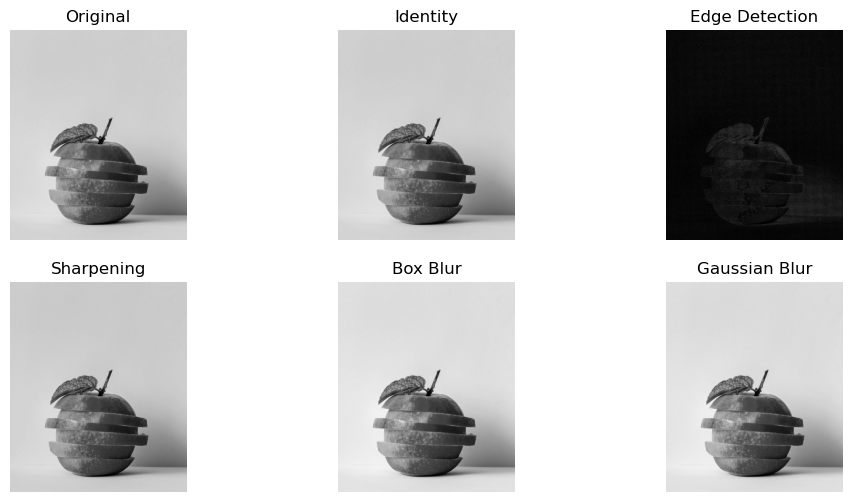

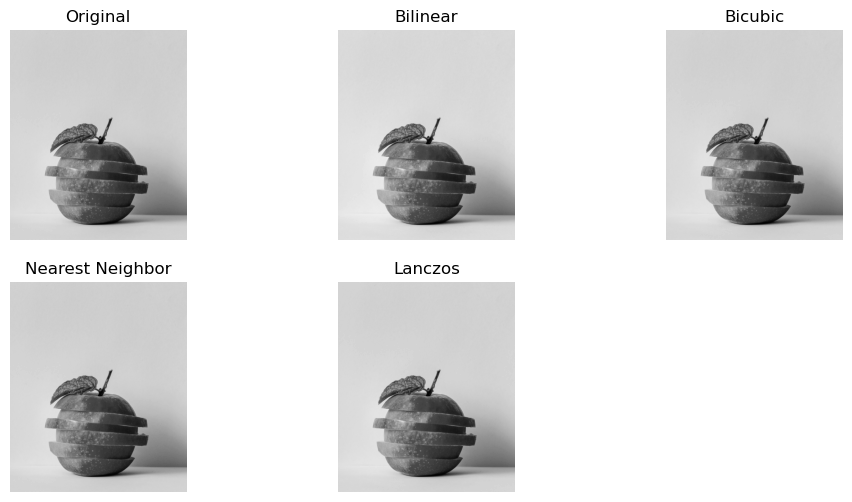

In [14]:
# Load an example image
image_path = r"D:\MSAIM\trimister-3 msaiml\Computer_vision\Computer_vision_practical\Lab1\img\pexels-john-finkelstein-680076-1630588.jpg"

import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_filter(image, kernel, correlation=False):
    if correlation:
        return cv2.filter2D(image, -1, kernel)
    else:
        return cv2.filter2D(image, -1, np.flipud(np.fliplr(kernel)))

# Load image
def load_image(image_path, grayscale=True):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE if grayscale else cv2.IMREAD_COLOR)
    return img

# Define Kernels
identity_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
edge_detection_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
box_blur_kernel = np.ones((3, 3), np.float32) / 9
gaussian_blur_kernel = cv2.getGaussianKernel(3, 1)
gaussian_blur_kernel = gaussian_blur_kernel @ gaussian_blur_kernel.T

def show_images(images, titles, cmap='gray'):
    plt.figure(figsize=(12, 6))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Load image

img = load_image(image_path)

# Apply kernels
filtered_images = [
    apply_filter(img, identity_kernel),
    apply_filter(img, edge_detection_kernel),
    apply_filter(img, sharpening_kernel),
    apply_filter(img, box_blur_kernel),
    apply_filter(img, gaussian_blur_kernel)
]

# Display results
show_images([img] + filtered_images, ['Original', 'Identity', 'Edge Detection', 'Sharpening', 'Box Blur', 'Gaussian Blur'])

# Image Resampling using Interpolation
def resample_image(image, scale_factor, interpolation):
    height, width = image.shape[:2]
    new_size = (int(width * scale_factor), int(height * scale_factor))
    return cv2.resize(image, new_size, interpolation=interpolation)

scales = 0.5
interpolations = [cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_NEAREST, cv2.INTER_LANCZOS4]
interpolation_names = ['Bilinear', 'Bicubic', 'Nearest Neighbor', 'Lanczos']
resampled_images = [resample_image(img, scales, interp) for interp in interpolations]

# Display resampled images
show_images([img] + resampled_images, ['Original'] + interpolation_names)


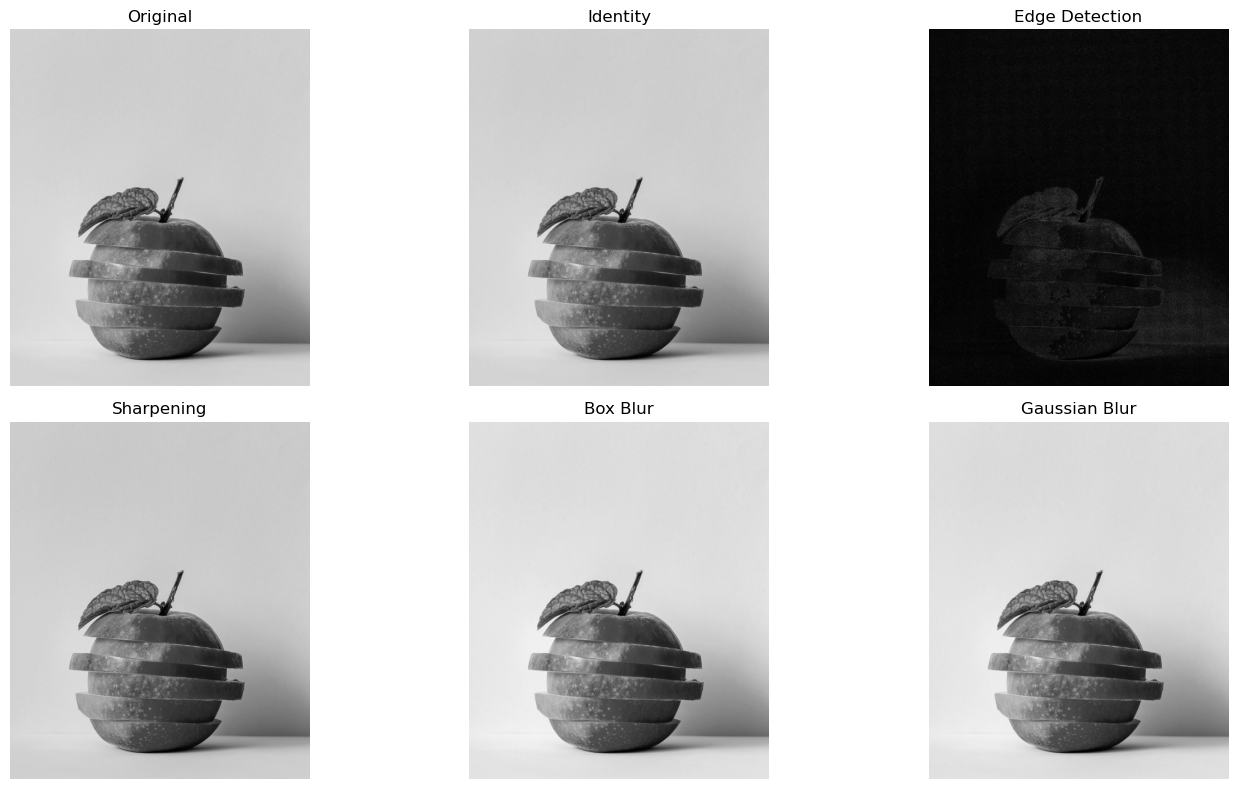

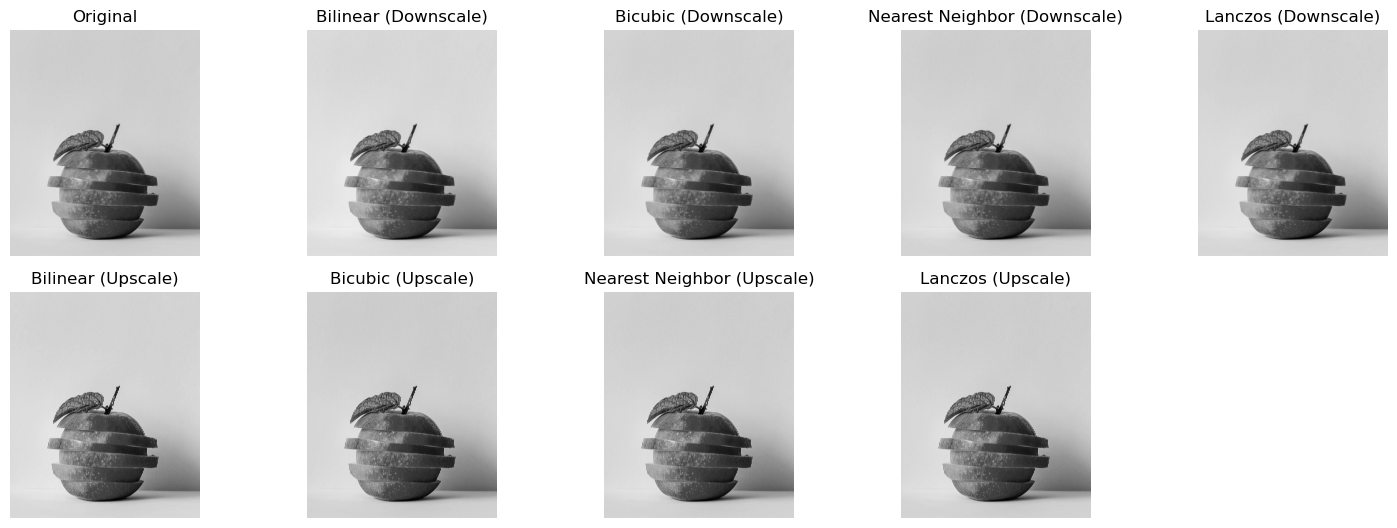

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_filter(image, kernel, correlation=False):
    if correlation:
        return cv2.filter2D(image, -1, kernel)
    else:
        return cv2.filter2D(image, -1, np.flipud(np.fliplr(kernel)))

# Load image
def load_image(image_path, grayscale=True):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE if grayscale else cv2.IMREAD_COLOR)
    return img

# Define Kernels
identity_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
edge_detection_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
box_blur_kernel = np.ones((3, 3), np.float32) / 9
gaussian_blur_kernel = cv2.getGaussianKernel(3, 1)
gaussian_blur_kernel = gaussian_blur_kernel @ gaussian_blur_kernel.T

def show_images(images, titles, cmap='gray', rows=2, cols=3):
    plt.figure(figsize=(15, 8))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap=cmap)
        plt.title(title, fontsize=12)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load image
img = load_image(image_path)

# Apply kernels
filtered_images = [
    apply_filter(img, identity_kernel),
    apply_filter(img, edge_detection_kernel),
    apply_filter(img, sharpening_kernel),
    apply_filter(img, box_blur_kernel),
    apply_filter(img, gaussian_blur_kernel)
]

# Display results with comparison
show_images([img] + filtered_images, ['Original', 'Identity', 'Edge Detection', 'Sharpening', 'Box Blur', 'Gaussian Blur'])

# Image Resampling using Interpolation
def resample_image(image, scale_factor, interpolation):
    height, width = image.shape[:2]
    new_size = (int(width * scale_factor), int(height * scale_factor))
    return cv2.resize(image, new_size, interpolation=interpolation)

scales = [0.5, 2.0]  # Downscale and Upscale
interpolations = [cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_NEAREST, cv2.INTER_LANCZOS4]
interpolation_names = ['Bilinear', 'Bicubic', 'Nearest Neighbor', 'Lanczos']

# Generate resampled images
resampled_images = []
resampled_titles = []
for scale in scales:
    for interp, name in zip(interpolations, interpolation_names):
        resampled_images.append(resample_image(img, scale, interp))
        resampled_titles.append(f'{name} ({"Down" if scale < 1 else "Up"}scale)')

# Display resampled images
show_images([img] + resampled_images, ['Original'] + resampled_titles, rows=3, cols=5)
